# Importing libraries and dataset

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [2]:
data = pd.read_csv('Car details.csv')
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
df = data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
df.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,8128,8128.000000,8.128000e+03,8.128000e+03,8128,8128,8128,8128,7907,7907,7913,7906,7907.000000
unique,2058,NaN,NaN,NaN,4,3,2,5,393,121,322,441,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,129,NaN,NaN,NaN,4402,6766,7078,5289,225,1017,377,530,NaN
mean,NaN,2013.804011,6.382718e+05,6.981951e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.416719
std,NaN,4.044249,8.062534e+05,5.655055e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959588
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.800000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


# Data Preprocessing

## Filling missing values

In [6]:
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [7]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [8]:
df[['mileage_number', 'mileage_unit']] = df['mileage'].str.split(' ', 1, expand=True)
df.drop(['mileage', 'mileage_unit'], axis=1, inplace=True)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,torque,seats,mileage_number
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,23.4
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,21.14
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,17.7
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,23.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,16.1


In [9]:
df[['engine_number', 'engine_unit']] = df['engine'].str.split(' ', 1, expand=True)
df.drop(['engine', 'engine_unit'], axis=1, inplace=True)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,max_power,torque,seats,mileage_number,engine_number
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,74 bhp,190Nm@ 2000rpm,5.0,23.4,1248
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,103.52 bhp,250Nm@ 1500-2500rpm,5.0,21.14,1498
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,17.7,1497
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,90 bhp,22.4 kgm at 1750-2750rpm,5.0,23.0,1396
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,16.1,1298


In [10]:
df[['max_power_number', 'max_power_unit']] = df['max_power'].str.split(' ', 1, expand=True)
df.drop(['max_power', 'max_power_unit'], axis=1, inplace=True)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,torque,seats,mileage_number,engine_number,max_power_number
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,190Nm@ 2000rpm,5.0,23.4,1248,74
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,250Nm@ 1500-2500rpm,5.0,21.14,1498,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,"12.7@ 2,700(kgm@ rpm)",5.0,17.7,1497,78
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,22.4 kgm at 1750-2750rpm,5.0,23.0,1396,90
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,"11.5@ 4,500(kgm@ rpm)",5.0,16.1,1298,88.2


In [11]:
df[['torque_number', 'torque_unit']] = df['torque'].str.split('@', 1, expand=True)
df['torque_number'] = df['torque_number'].str.extract('(^\d*)')
df.drop(['torque_unit', 'torque'], axis=1, inplace=True)

df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,mileage_number,engine_number,max_power_number,torque_number
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,23.4,1248,74,190
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,21.14,1498,103.52,250
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,17.7,1497,78,12
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,23.0,1396,90,22
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,16.1,1298,88.2,11


In [12]:
df['torque_number'] = df['torque_number'].astype(float)

In [13]:
def change_unit(x):
    return 9.8*x if x <= 50 else x
df['torque_number'] = df['torque_number'].apply(change_unit)

In [14]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,mileage_number,engine_number,max_power_number,torque_number
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,23.4,1248,74,190.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,21.14,1498,103.52,250.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,17.7,1497,78,117.6
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,23.0,1396,90,215.6
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,16.1,1298,88.2,107.8


In [15]:
df.isna().sum()

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
seats               221
mileage_number      221
engine_number       221
max_power_number    215
torque_number       222
dtype: int64

In [16]:
df['seats'].fillna(df['seats'].mean(), inplace=True)

In [17]:
df['mileage_number'] = df['mileage_number'].astype(float)
df['mileage_number'].fillna(df['mileage_number'].mean(), inplace=True)

In [18]:
df['engine_number'] = df['engine_number'].astype(float)
df['engine_number'].fillna(df['engine_number'].mean(), inplace=True)

In [19]:
df['max_power_number'].replace({'': np.nan}, inplace=True)
df['max_power_number'] = df['max_power_number'].astype(float)
df['max_power_number'].fillna(df['max_power_number'].mean(), inplace=True)

In [20]:
df['torque_number'] = df['torque_number'].astype(float)
df['torque_number'].fillna(df['torque_number'].mean(), inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              8128 non-null   object 
 1   year              8128 non-null   int64  
 2   selling_price     8128 non-null   int64  
 3   km_driven         8128 non-null   int64  
 4   fuel              8128 non-null   object 
 5   seller_type       8128 non-null   object 
 6   transmission      8128 non-null   object 
 7   owner             8128 non-null   object 
 8   seats             8128 non-null   float64
 9   mileage_number    8128 non-null   float64
 10  engine_number     8128 non-null   float64
 11  max_power_number  8128 non-null   float64
 12  torque_number     8128 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 825.6+ KB


## Encoding categorical features

In [22]:
df.drop('name', axis=1, inplace=True)

In [23]:
categorical_cols = []
for col in df.columns:
    if df[col].dtypes == 'object':
        categorical_cols.append(col)
print(categorical_cols)

['fuel', 'seller_type', 'transmission', 'owner']


In [24]:
df = pd.concat([df, pd.get_dummies(df[categorical_cols], drop_first=True)], axis=1)
df.drop(categorical_cols, axis=1, inplace=True)
df.head()

,year,selling_price,km_driven,seats,mileage_number,engine_number,max_power_number,torque_number,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,5.0,23.40,1248.0,74.00,190.0,1,0,0,1,0,1,0,0,0,0
1,2014,370000,120000,5.0,21.14,1498.0,103.52,250.0,1,0,0,1,0,1,0,1,0,0
2,2006,158000,140000,5.0,17.70,1497.0,78.00,117.6,0,0,1,1,0,1,0,0,0,1
3,2010,225000,127000,5.0,23.00,1396.0,90.00,215.6,1,0,0,1,0,1,0,0,0,0
4,2007,130000,120000,5.0,16.10,1298.0,88.20,107.8,0,0,1,1,0,1,0,0,0,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          8128 non-null   int64  
 1   selling_price                 8128 non-null   int64  
 2   km_driven                     8128 non-null   int64  
 3   seats                         8128 non-null   float64
 4   mileage_number                8128 non-null   float64
 5   engine_number                 8128 non-null   float64
 6   max_power_number              8128 non-null   float64
 7   torque_number                 8128 non-null   float64
 8   fuel_Diesel                   8128 non-null   uint8  
 9   fuel_LPG                      8128 non-null   uint8  
 10  fuel_Petrol                   8128 non-null   uint8  
 11  seller_type_Individual        8128 non-null   uint8  
 12  seller_type_Trustmark Dealer  8128 non-null   uint8  
 13  tra

In [26]:
from datetime import date
df['car_age'] = date.today().year - df['year']
df.drop('year', axis=1, inplace=True)
df.head()

,selling_price,km_driven,seats,mileage_number,engine_number,max_power_number,torque_number,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,car_age
0,450000,145500,5.0,23.40,1248.0,74.00,190.0,1,0,0,1,0,1,0,0,0,0,8
1,370000,120000,5.0,21.14,1498.0,103.52,250.0,1,0,0,1,0,1,0,1,0,0,8
2,158000,140000,5.0,17.70,1497.0,78.00,117.6,0,0,1,1,0,1,0,0,0,1,16
3,225000,127000,5.0,23.00,1396.0,90.00,215.6,1,0,0,1,0,1,0,0,0,0,12
4,130000,120000,5.0,16.10,1298.0,88.20,107.8,0,0,1,1,0,1,0,0,0,0,15


# Model Building

## train test split and scaling

In [27]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Linear Regression

In [30]:
regressor_lr = LinearRegression()
regressor_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
regressor_lr.score(X_train, y_train)

0.6824513015572227

In [32]:
regressor_lr.score(X_test, y_test)

0.6866941519239352

In [33]:
pred_lr = regressor_lr.predict(X_test)

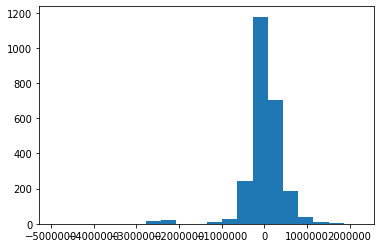

In [34]:
plt.hist(pred_lr-y_test, bins=20)
plt.show()

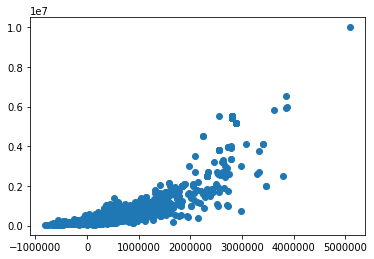

In [35]:
plt.scatter(pred_lr, y_test)
plt.show()

In [36]:
from sklearn import metrics
print('MAE = ', metrics.mean_absolute_error(y_test, pred_lr))
print('MSE = ', metrics.mean_squared_error(y_test, pred_lr))
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, pred_lr)))
print('R2 = ', metrics.r2_score(y_test, pred_lr))

MAE =  274592.84811840294
MSE =  215824173659.93466
RMSE =  464568.80401070265
R2 =  0.6866941519239353


## Random Forest

In [37]:
regressor_rf = RandomForestRegressor()
regressor_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [38]:
regressor_rf.score(X_train, y_train)

0.9955354151678866

In [39]:
regressor_rf.score(X_test, y_test)

0.9559698412919173

In [40]:
pred_rf = regressor_rf.predict(X_test)

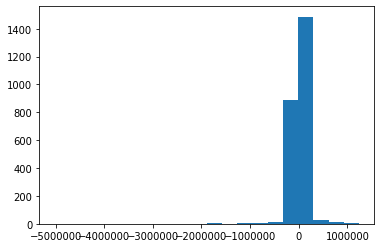

In [41]:
plt.hist(pred_rf-y_test, bins=20)
plt.show()

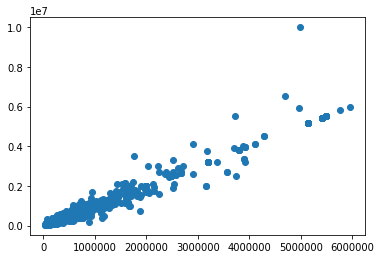

In [42]:
plt.scatter(pred_rf, y_test)
plt.show()

In [43]:
from sklearn import metrics
print('MAE = ', metrics.mean_absolute_error(y_test, pred_rf))
print('MSE = ', metrics.mean_squared_error(y_test, pred_rf))
print('RMSE = ', np.sqrt(metrics.mean_squared_error(y_test, pred_rf)))
print('R2 = ', metrics.r2_score(y_test, pred_rf))

MAE =  73046.79421786066
MSE =  30330658293.300137
RMSE =  174156.99323684978
R2 =  0.9559698412919173


## SVR

In [44]:
sc2 = StandardScaler()
y_train = sc2.fit_transform(pd.DataFrame(y_train))
y_test = sc2.transform(pd.DataFrame(y_test))

In [45]:
regressor_sv = SVR()
regressor_sv.fit(X_train, y_train)

C:\Users\Mohamadreza\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [46]:
regressor_sv.score(X_train, y_train)

0.9445045612171126

In [47]:
regressor_sv.score(X_test, y_test)

0.865735124505293

In [48]:
pred_sv = regressor_sv.predict(X_test)

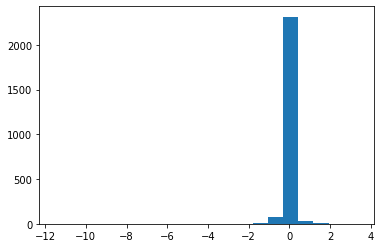

In [49]:
plt.hist(pred_sv.reshape(-1,1)-y_test, bins=20)
plt.show()

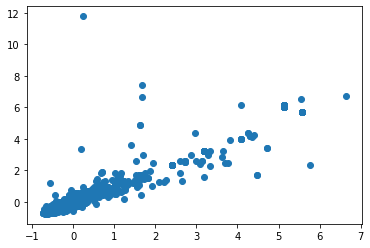

In [50]:
plt.scatter(pred_sv, y_test)
plt.show()

In [51]:
from sklearn import metrics
print('MAE = ', metrics.mean_absolute_error(sc2.inverse_transform(y_test), sc2.inverse_transform(pred_sv)))
print('MSE = ', metrics.mean_squared_error(sc2.inverse_transform(y_test), sc2.inverse_transform(pred_sv)))
print('RMSE = ', np.sqrt(metrics.mean_squared_error(sc2.inverse_transform(y_test), sc2.inverse_transform(pred_sv))))
print('R2 = ', metrics.r2_score(sc2.inverse_transform(y_test), sc2.inverse_transform(pred_sv)))

MAE =  110582.25506207006
MSE =  92489833761.94093
RMSE =  304121.41286325257
R2 =  0.865735124505293
